In [5]:
#importing all the relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
#Reading the csv file
flight=pd.read_csv("/content/flights.csv")

In [6]:
#Top 5 rows of the dataset
flight.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flight.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
62001,2015,1,4,7,OO,4548,N161PQ,SLC,FCA,2155,...,2341.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62002,2015,1,4,7,OO,4805,N459SW,MSP,RAP,2155,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
62003,2015,1,4,7,OO,5531,N930SW,DEN,GTF,2155,...,39.0,44.0,0.0,0.0,NaN,0.0,0.0,37.0,7.0,0.0
62004,2015,1,4,7,OO,7388,N560SW,SLC,EKO,2155,...,2145.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62005,2015,1,4,7,DL,558,N901DE,ATL,BNA,2156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Total No. of observations : {}".format(len(flight)))

Total No. of observations : 62006


In [9]:
print("Total No. of features : {}".format(len(flight.columns)))

Total No. of features : 31


In [10]:
for col in flight.columns:
    print(col)

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [11]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62006 entries, 0 to 62005
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 62006 non-null  int64  
 1   MONTH                62006 non-null  int64  
 2   DAY                  62006 non-null  int64  
 3   DAY_OF_WEEK          62006 non-null  int64  
 4   AIRLINE              62006 non-null  object 
 5   FLIGHT_NUMBER        62006 non-null  int64  
 6   TAIL_NUMBER          61937 non-null  object 
 7   ORIGIN_AIRPORT       62006 non-null  object 
 8   DESTINATION_AIRPORT  62006 non-null  object 
 9   SCHEDULED_DEPARTURE  62006 non-null  int64  
 10  DEPARTURE_TIME       60573 non-null  float64
 11  DEPARTURE_DELAY      60573 non-null  float64
 12  TAXI_OUT             60543 non-null  float64
 13  WHEELS_OFF           60543 non-null  float64
 14  SCHEDULED_TIME       62005 non-null  float64
 15  ELAPSED_TIME         60398 non-null 

In [12]:
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 1433
The missing values in Arrival delays: 1608


In [13]:
#Top 10 values where the arrival and departure delays are missing
flight[(flight['ARRIVAL_DELAY'].isnull()) | (flight['DEPARTURE_DELAY'].isnull()) ][['ARRIVAL_DELAY','ARRIVAL_TIME','DEPARTURE_DELAY','DEPARTURE_TIME']].head(10)

,ARRIVAL_DELAY,ARRIVAL_TIME,DEPARTURE_DELAY,DEPARTURE_TIME
32,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN


In [14]:
#Dropping the null values in departure and arrival delay
flight.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'],inplace=True)


In [15]:
#Total number of observations after dropping the null values of departure and arrival delay
len(flight)

60398

In [16]:
# The current number of missing values in departyure and arrival delays
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 0
The missing values in Arrival delays: 0


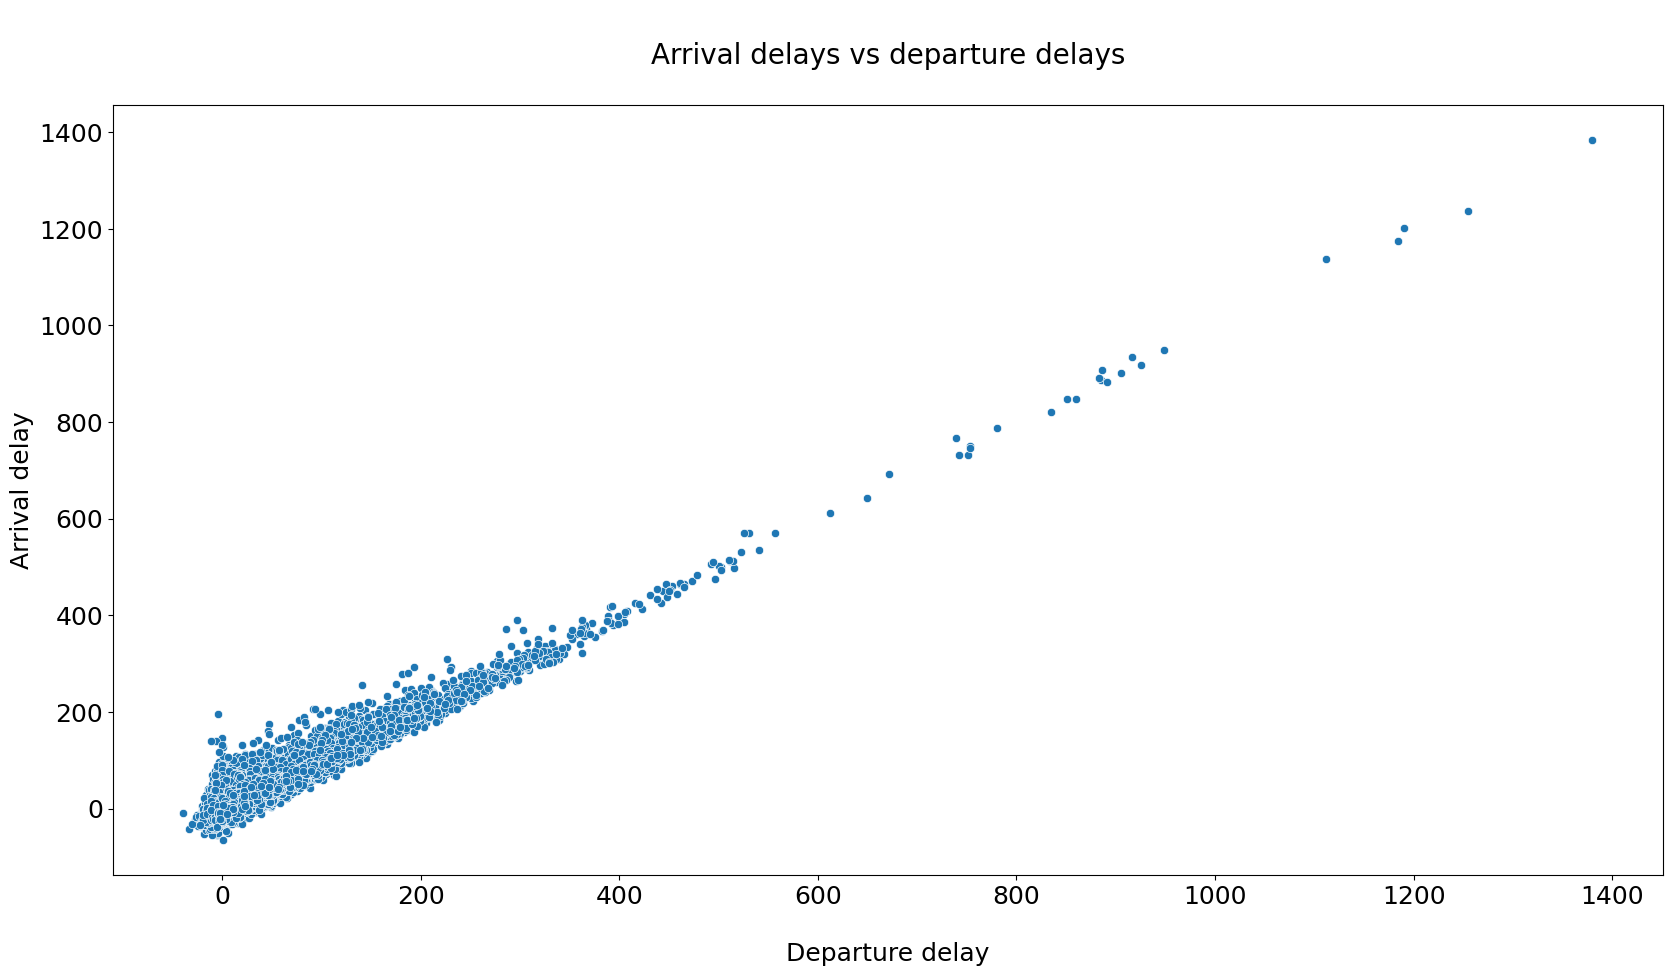

In [17]:
#Scatter plot between arrival and departure delay
plt.figure(figsize=(20,10))
sns.scatterplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=flight)
plt.xlabel("\nDeparture delay" ,fontsize=18)
plt.ylabel("Arrival delay" ,fontsize=18)
plt.title("\nArrival delays vs departure delays\n",fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

In [18]:
# Mean and median of arrival and departure delay
print("Average departure delay : {} " .format(flight['DEPARTURE_DELAY'].mean()))
print("Median departure delay : {} " .format(flight['DEPARTURE_DELAY'].median()))
print("Average arrival delay : {} " .format(flight['ARRIVAL_DELAY'].mean()))
print("Median arrival delay : {} " .format(flight['ARRIVAL_DELAY'].median()))

Average departure delay : 19.8437365475678 
Median departure delay : 3.0 
Average arrival delay : 18.38809232093778 
Median arrival delay : 5.0 


In [19]:
#No. of airlines
print("The No. of airlines : {}".format(flight['AIRLINE'].nunique()))
# Number of observations in each of the 14 airlines
print("The different airlines and their count : \n")
count_air=pd.DataFrame(flight['AIRLINE'].value_counts())
count_air=count_air.rename(columns={'AIRLINE':'COUNT'})
count_air

The No. of airlines : 14
The different airlines and their count : 



,COUNT
WN,12894
DL,8013
EV,6382
OO,6339
AA,5769
UA,5097
US,4300
MQ,3351
B6,2931
AS,1798


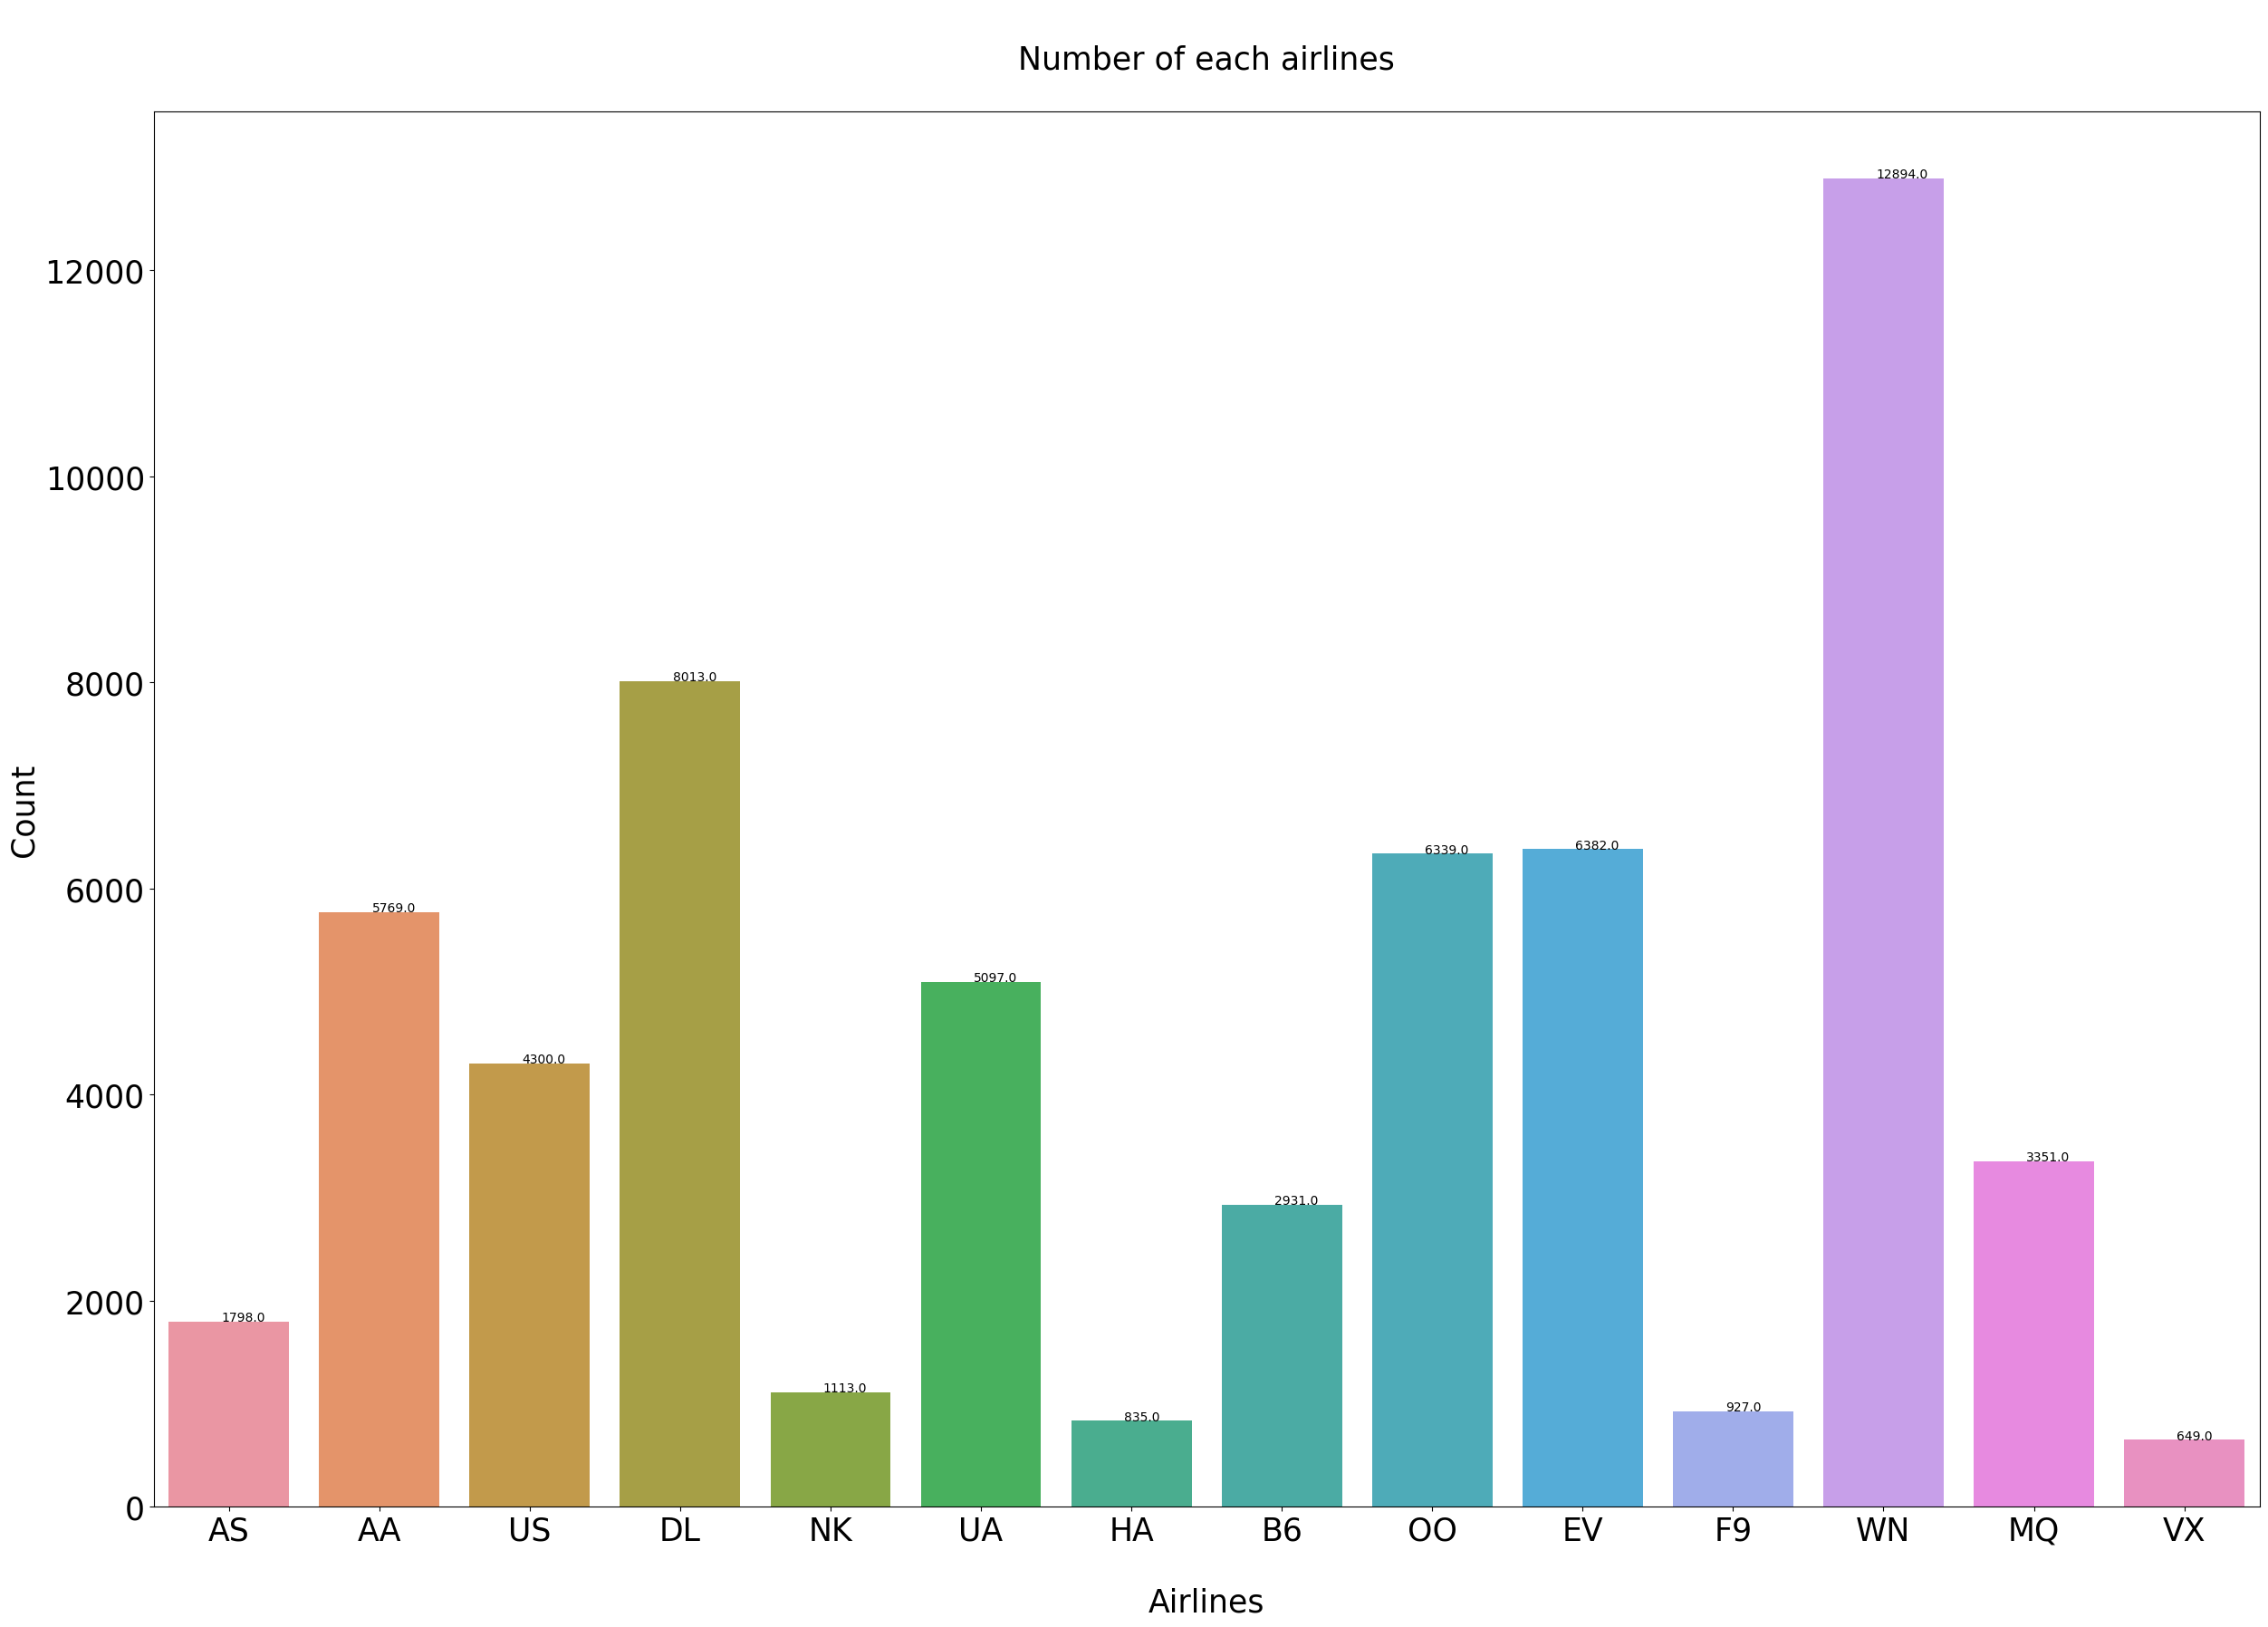

In [20]:
plt.figure(figsize=(30,20))# Creating an empty plot
ax=sns.countplot(x=flight['AIRLINE'])# Countplot of airlines
plt.tick_params(labelsize=25)# changing the label sizes
plt.xlabel("\nAirlines" ,fontsize=25) # Adding x-label
plt.ylabel("Count" ,fontsize=25) #Adding y-label
plt.title("\nNumber of each airlines\n",fontsize=25) # Adding plot title
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.35,p.get_height()+5)) # Adding the count above the bars
plt.show()

In [21]:
#Using melt() on arrival and departure delay to create one boxplot for both. Makes it easy to compare the two
flightmelt=flight[['AIRLINE','DEPARTURE_DELAY','ARRIVAL_DELAY']]
flightmelt=pd.melt(flightmelt,id_vars=['AIRLINE'],var_name=['ARRIVAL/DEPARTURE DELAY'],value_name='DELAY')
flightmelt.head() # Top 5 rows after melting

,AIRLINE,ARRIVAL/DEPARTURE DELAY,DELAY
0,AS,DEPARTURE_DELAY,-11.0
1,AA,DEPARTURE_DELAY,-8.0
2,US,DEPARTURE_DELAY,-2.0
3,AA,DEPARTURE_DELAY,-5.0
4,AS,DEPARTURE_DELAY,-1.0


<ipython-input-22-b4cc17e28f0f>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-50,100,10) #To get better visibilit of the IQR, we limit the yaxis to 100.We will compropmise on few outliers.


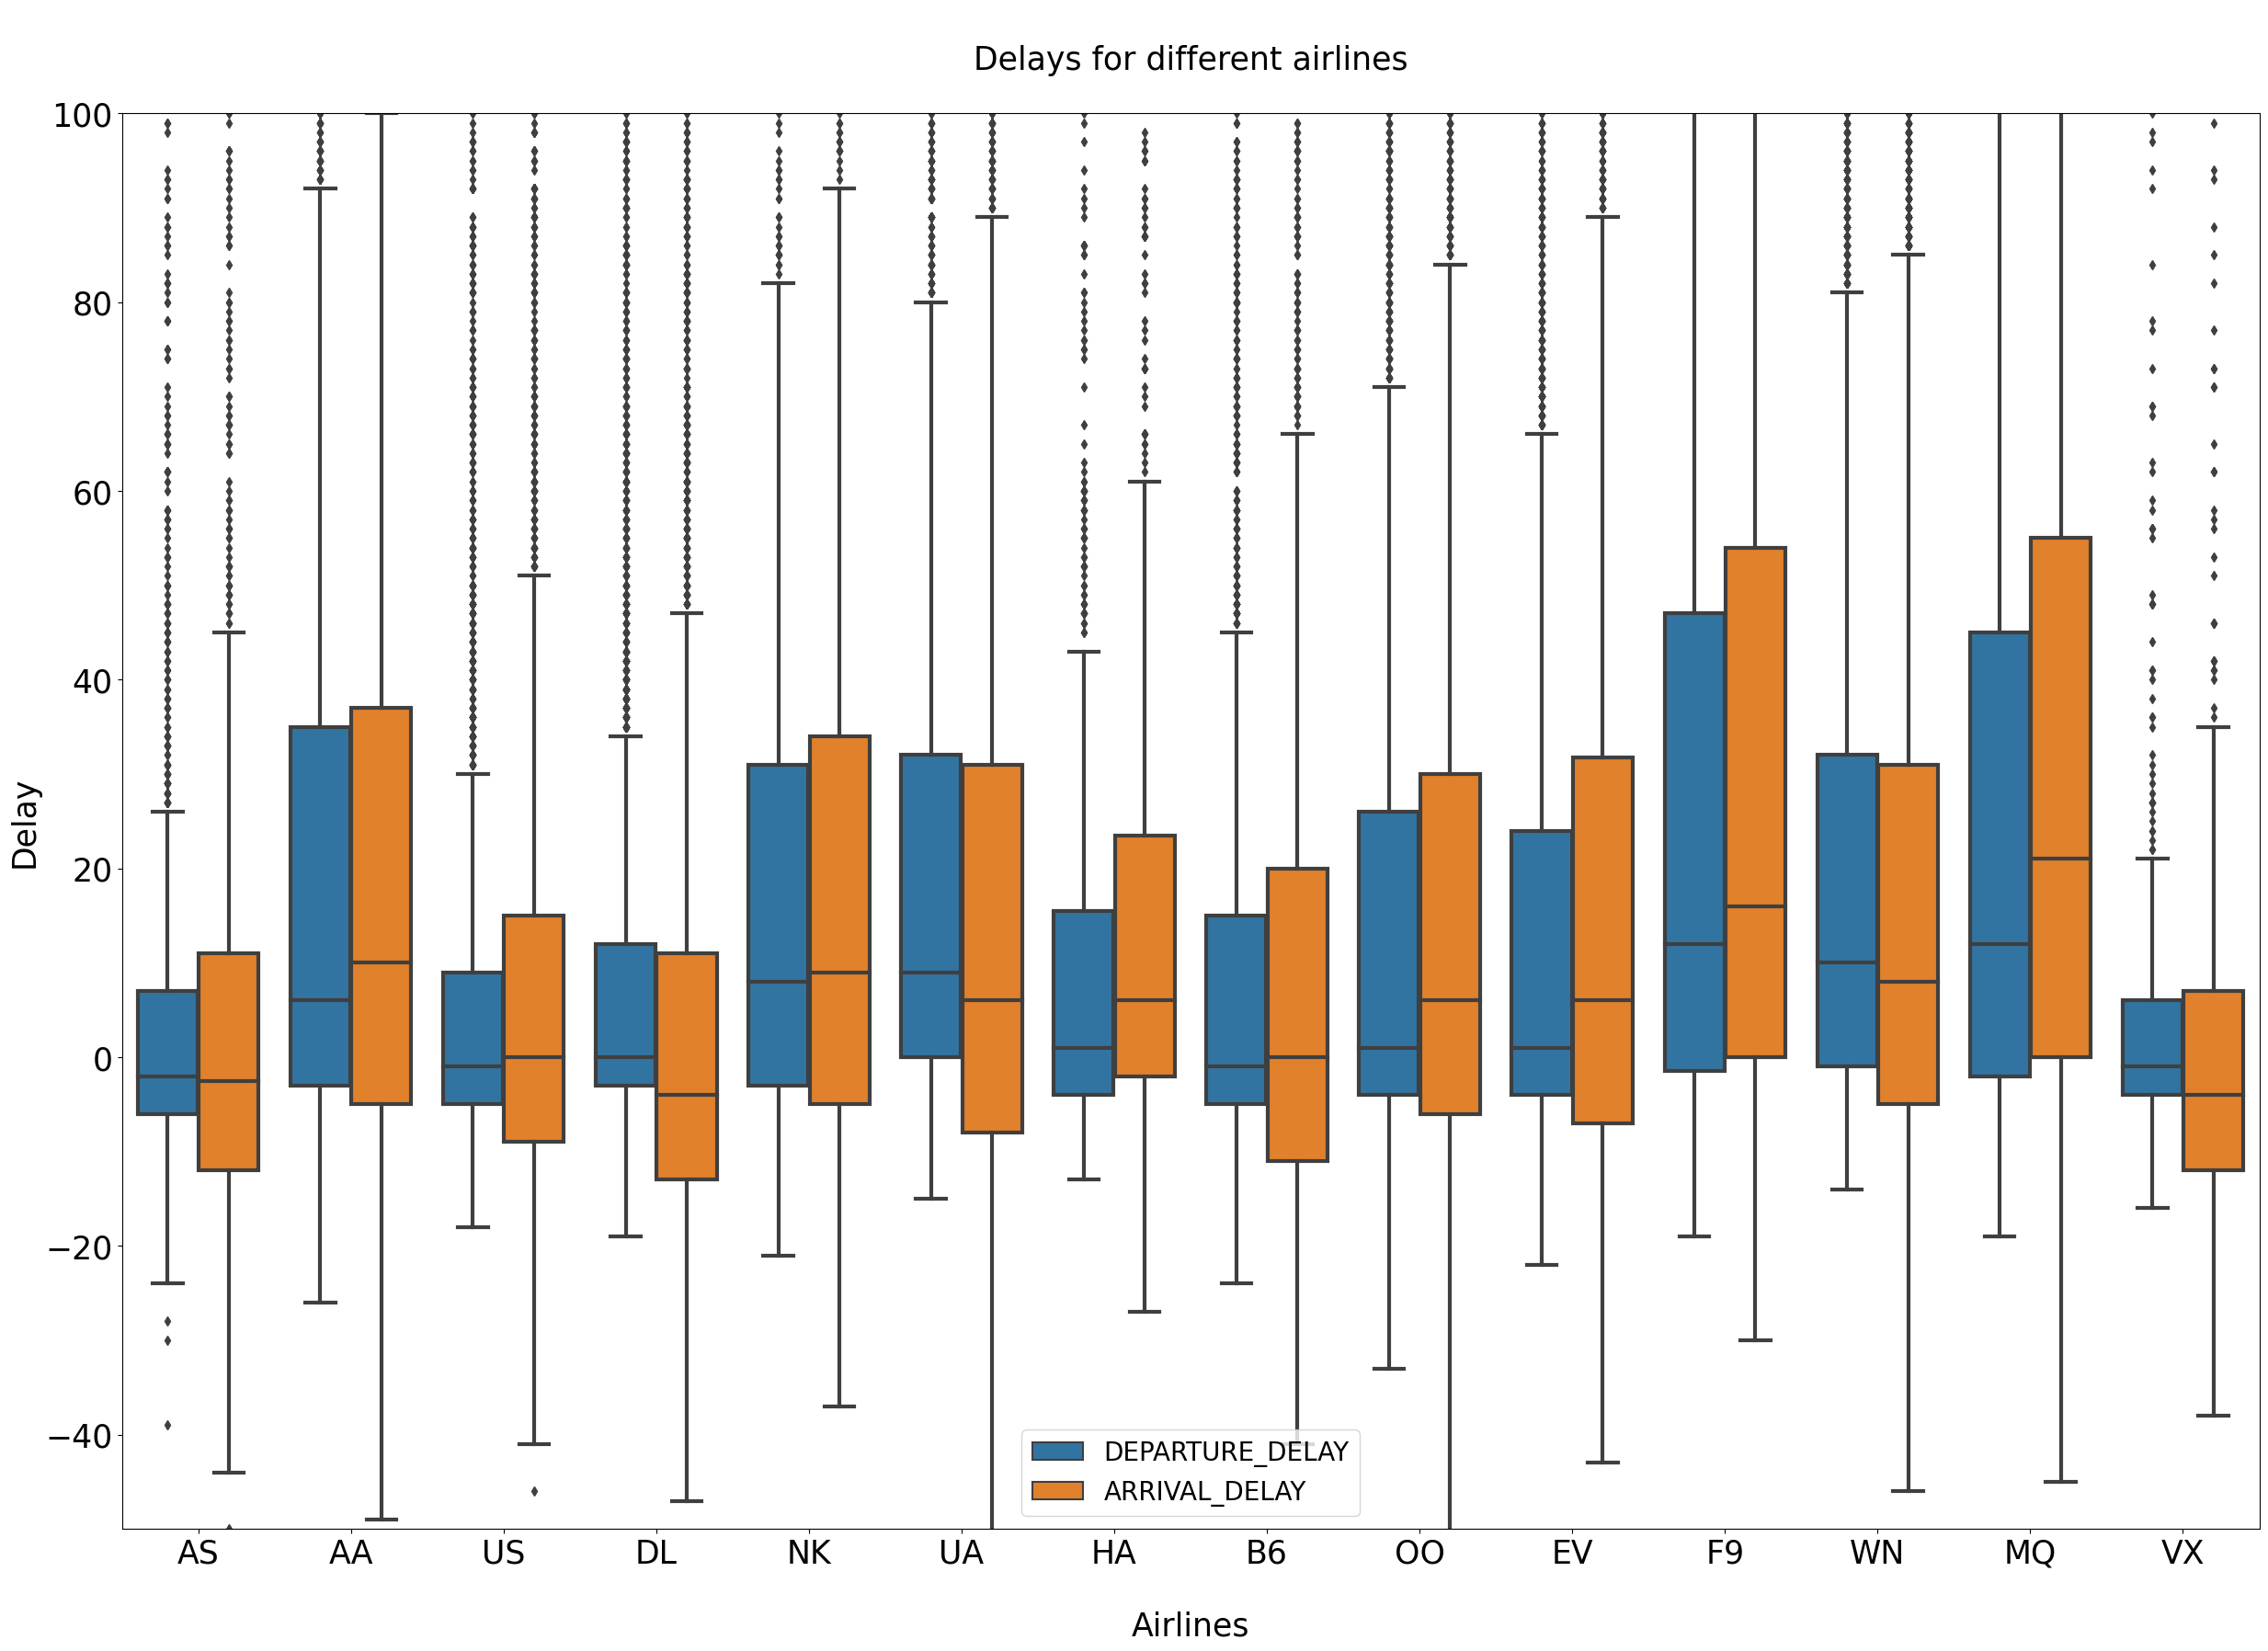

In [22]:
#Boxplot of arrival delays and departure delays group by the airlines
plt.figure(figsize=(30,20))
sns.boxplot(x=flightmelt['AIRLINE'],y=flightmelt['DELAY'],hue=flightmelt['ARRIVAL/DEPARTURE DELAY'],linewidth=3,fliersize=5)# using the melted dataframe instead of the original dataframe
plt.tick_params(labelsize=25)
plt.xlabel("\nAirlines" ,fontsize=25)
plt.ylabel("Delay" ,fontsize=25)
plt.legend(fontsize=20)
plt.ylim(-50,100,10) #To get better visibilit of the IQR, we limit the yaxis to 100.We will compropmise on few outliers.
plt.title("\nDelays for different airlines\n",fontsize=25)
plt.show()

In [23]:
#Departure delay summary grouped by airlines
depart_airline_5=flight.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()
depart_airline_5=depart_airline_5[['mean','count','min','25%','50%','75%','max']] #Adding only the information I need to the dataframe
depart_airline_5=depart_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # renaming few column names
depart_airline_5=depart_airline_5.sort_values(by='Median',ascending=False) #Rearranging in descending order of median
print("\nDEPARTURE DELAY SUMMARY BASED ON AIRLINES: ")
depart_airline_5


DEPARTURE DELAY SUMMARY BASED ON AIRLINES: 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
F9,35.326861,927.0,-19.0,-1.5,12.0,47.0,388.0
MQ,30.879737,3351.0,-19.0,-2.0,12.0,45.0,780.0
WN,21.939895,12894.0,-14.0,-1.0,10.0,32.0,541.0
UA,24.531489,5097.0,-15.0,0.0,9.0,32.0,739.0
NK,22.884996,1113.0,-21.0,-3.0,8.0,31.0,557.0
AA,26.443404,5769.0,-26.0,-3.0,6.0,35.0,1380.0
EV,21.169226,6382.0,-22.0,-4.0,1.0,24.0,526.0
HA,12.754491,835.0,-13.0,-4.0,1.0,15.5,223.0
OO,21.015933,6339.0,-33.0,-4.0,1.0,26.0,883.0


In [24]:
#Arrival delay summary grouped by airlines
arr_airline_5=flight.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()
arr_airline_5=arr_airline_5[['mean','count','min','25%','50%','75%','max']]  #Adding only the information I need to the dataframe
arr_airline_5=arr_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # renaming few column names
arr_airline_5=arr_airline_5.sort_values(by='Median',ascending=False) #Rearranging in descending order of median
print("\nARRIVAL DELAY SUMMARY BASED ON AIRLINE : ")
arr_airline_5


ARRIVAL DELAY SUMMARY BASED ON AIRLINE : 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
MQ,37.025664,3351.0,-45.0,0.0,21.0,55.00,788.0
F9,37.491909,927.0,-30.0,0.0,16.0,54.00,388.0
AA,26.287745,5769.0,-49.0,-5.0,10.0,37.00,1384.0
NK,22.316262,1113.0,-37.0,-5.0,9.0,34.00,570.0
WN,18.842718,12894.0,-46.0,-5.0,8.0,31.00,535.0
EV,22.384049,6382.0,-43.0,-7.0,6.0,31.75,571.0
HA,17.668263,835.0,-27.0,-2.0,6.0,23.50,236.0
OO,21.616028,6339.0,-54.0,-6.0,6.0,30.00,892.0
UA,19.119090,5097.0,-51.0,-8.0,6.0,31.00,768.0


In [25]:
#Departure delay summary grouped by airports
depart_airport=flight.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].describe()
depart_airport=depart_airport[['mean','count','min','25%','50%','75%','max']]
depart_airport=depart_airport.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})# renaming few column names
depart_airport=depart_airport.sort_values(by='mean',ascending=False)
depart_airport=depart_airport.head(10) #We will only need the top 10 rows of our dataset for airports with high departure delay
print("\nDEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : ")
depart_airport


DEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : 


,mean,count,Min,Q1,Median,Q3,Max
ORIGIN_AIRPORT,,,,,,,
LAW,76.000000,10.0,-4.0,29.75,53.0,74.00,364.0
TTN,71.636364,33.0,-6.0,4.00,32.0,121.00,319.0
OTH,69.500000,2.0,4.0,36.75,69.5,102.25,135.0
ILG,67.000000,3.0,19.0,27.50,36.0,91.00,146.0
ASE,59.349515,103.0,-10.0,14.50,38.0,85.00,461.0
CLL,58.850000,20.0,-10.0,-1.00,11.5,22.75,780.0
ROW,53.600000,5.0,27.0,36.00,46.0,49.00,110.0
SJT,47.727273,11.0,-1.0,13.00,30.0,69.00,157.0
MAF,46.403846,52.0,-9.0,10.75,25.0,65.75,362.0


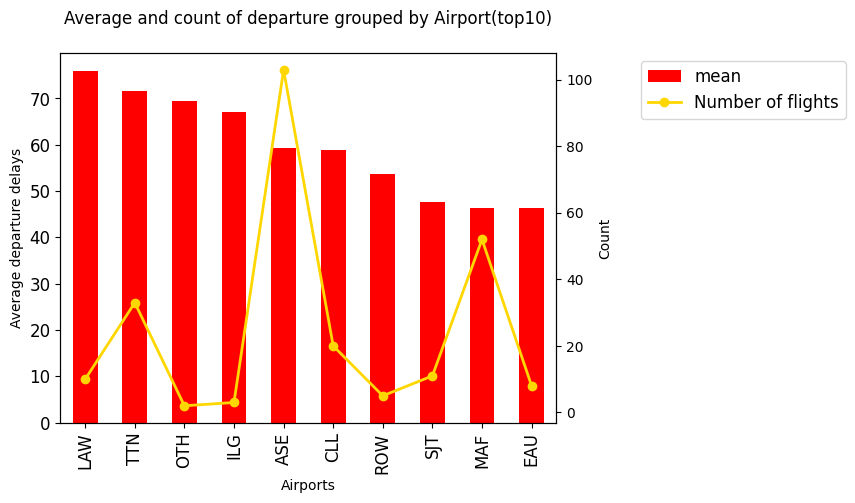

In [26]:
fig = plt.figure() #Creating an empty figure
ax = depart_airport['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False) # creating a plot of first y axis for mean
ax2 = ax.twinx() # A second y axis for "count"
ax2.plot(ax.get_xticks(),depart_airport['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of flights") #creating a plot for second y axis for count
ax.set_title("Average and count of departure grouped by Airport(top10)\n")
ax.set_xlabel("Airports")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels() #Adding legend for 1st y axis
lines2, labels2 = ax2.get_legend_handles_labels() #adding legend for 2nd y axis
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12) # positioning/sizing the legends
plt.show()

In [27]:
#Creating a dataframe for only the departure delays (positive values)
depart_delay_positive=flight[(flight['DEPARTURE_DELAY']>0) ]
depart_delay_positive['DEPARTURE_DELAY']

7         14.0
9          3.0
20        25.0
27        12.0
29        21.0
         ...  
61998     81.0
61999    130.0
62000     47.0
62001      5.0
62003     47.0
Name: DEPARTURE_DELAY, Length: 33851, dtype: float64

In [28]:
# Extracting departure delay and distance from flight dataset and sorting in descending order by distance first and then by departure delay
depart_dist=flight[['DEPARTURE_DELAY','DISTANCE']].sort_values(by=['DISTANCE','DEPARTURE_DELAY'],ascending=False)
depart_dist.head(15) # Top 15 long distance flights

,DEPARTURE_DELAY,DISTANCE
41966,31.0,4983.0
26113,24.0,4983.0
34018,22.0,4983.0
25298,10.0,4983.0
9394,7.0,4983.0
17541,4.0,4983.0
41191,4.0,4983.0
49513,4.0,4983.0
18335,3.0,4983.0
57918,2.0,4983.0


In [29]:
depart_dist.tail(15) # Top 15 short distance flights

,DEPARTURE_DELAY,DISTANCE
2595,-10.0,67.0
15181,-10.0,67.0
22114,-10.0,67.0
31302,-10.0,67.0
25788,-11.0,67.0
10406,-18.0,67.0
29751,-33.0,67.0
40257,50.0,31.0
56093,38.0,31.0
51725,19.0,31.0


<ipython-input-30-fe5389f9dbc6>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,2000,500) # Limiting x axis for better view of data points
<ipython-input-30-fe5389f9dbc6>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,200,50) # Limiting y axis for better view of data points


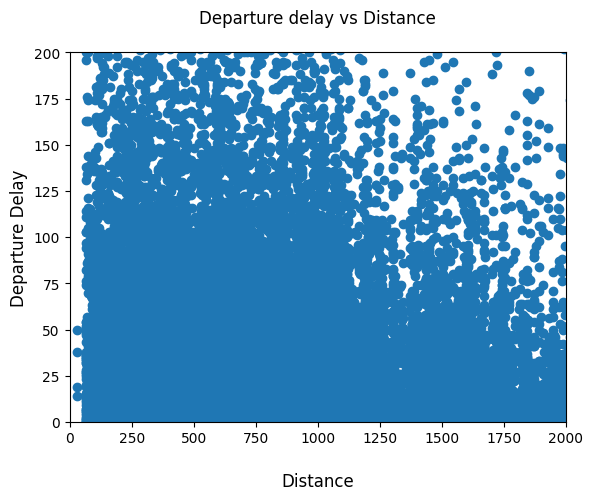

In [30]:
plt.scatter(x=flight['DISTANCE'],y=flight['DEPARTURE_DELAY']) #scatter plot between distance and departure delay
plt.xlim(0,2000,500) # Limiting x axis for better view of data points
plt.ylim(0,200,50) # Limiting y axis for better view of data points
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Departure Delay" ,fontsize=12)
plt.title("Departure delay vs Distance\n")
plt.show()

<ipython-input-31-52910607f192>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,2000,500) # Limiting x axis for better view of data points
<ipython-input-31-52910607f192>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,200,50) # Limiting y axis for better view of data points


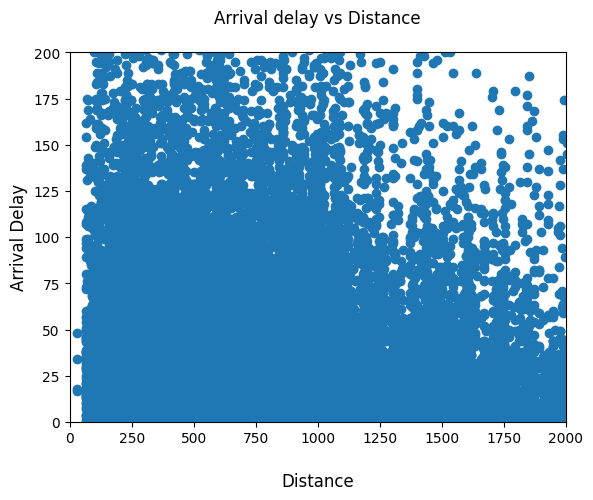

In [31]:
plt.scatter(x=flight['DISTANCE'],y=flight['ARRIVAL_DELAY']) #scatter plot between distance and arrival delay
plt.xlim(0,2000,500) # Limiting x axis for better view of data points
plt.ylim(0,200,50) # Limiting y axis for better view of data points
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Arrival Delay" ,fontsize=12)
plt.title("Arrival delay vs Distance\n")
plt.show()

In [32]:
flight[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].corr() #Correlation of distance, departure delay, arrival delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
DEPARTURE_DELAY,1.000000,0.955795,0.006446
ARRIVAL_DELAY,0.955795,1.000000,-0.020708
DISTANCE,0.006446,-0.020708,1.000000


In [33]:
# Top 10 long distance flights with departure delay(positive) and their corresponding arrival delay
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
26113,24.0,-2.0,4983.0
17541,4.0,-8.0,4983.0
9394,7.0,3.0,4983.0
41966,31.0,18.0,4983.0
49513,4.0,-47.0,4983.0
41191,4.0,19.0,4983.0
25298,10.0,15.0,4983.0
18335,3.0,39.0,4983.0
50284,1.0,7.0,4983.0
2253,1.0,-6.0,4983.0


In [34]:
# Top 10 shorty distance flights with departure delay(positive) and their corresponding arrival delay
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).tail(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
58247,138.0,154.0,67.0
38673,15.0,28.0,67.0
56145,47.0,73.0,67.0
36733,32.0,57.0,67.0
37058,11.0,45.0,67.0
47256,37.0,97.0,67.0
40257,50.0,48.0,31.0
51725,19.0,17.0,31.0
24253,14.0,18.0,31.0
56093,38.0,34.0,31.0


<ipython-input-35-8d83c6ef9aae>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,3000,500)
<ipython-input-35-8d83c6ef9aae>:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,400,50)


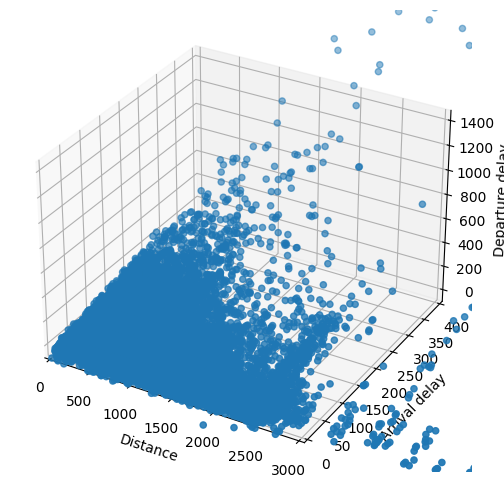

In [35]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(depart_delay_positive['DISTANCE'],depart_delay_positive['ARRIVAL_DELAY'],depart_delay_positive['DEPARTURE_DELAY'])
ax.set_xlabel('Distance')
ax.set_ylabel('Arrival delay')
ax.set_zlabel('Departure delay')
plt.xlim(0,3000,500)
plt.ylim(0,400,50)
plt.show()

In [36]:
# Creating a dataframe to obtain the summary of departure delay grouped by day of week
depart_dow=flight.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].describe()
depart_dow=depart_dow[['mean','count','min','25%','50%','75%','max']] # extracting the parameter we need
depart_dow=depart_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # Renaming them
print("\nDEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
depart_dow


DEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
4,9.562017,13464.0,-27.0,-4.0,-1.0,11.0,1190.0
5,12.623542,16456.0,-39.0,-4.0,0.0,16.0,905.0
6,25.095216,15050.0,-30.0,-2.0,8.0,34.0,1380.0
7,31.395061,15428.0,-26.0,-1.0,11.0,43.0,1255.0


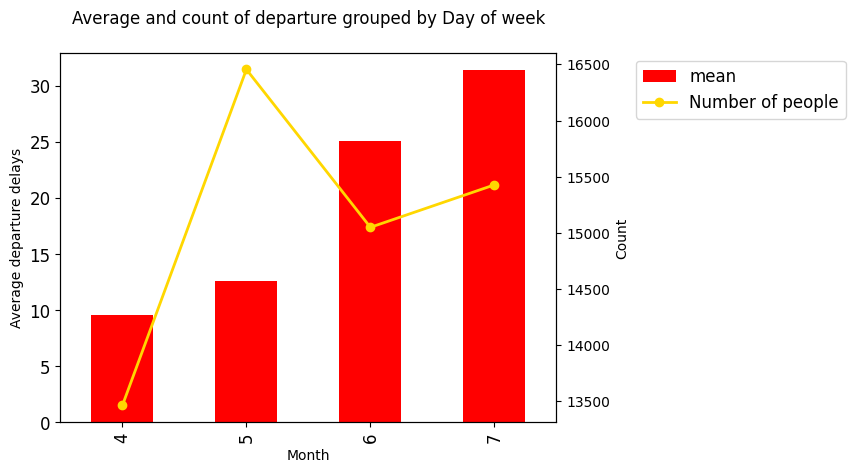

In [37]:
#Creating a plot with x as day of week, Y1 as mean and y2 a count
fig = plt.figure()
ax = depart_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [38]:
# Creating a dataframe to obtain the summary of arrival delay grouped by day of week
arr_dow=flight.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].describe()
arr_dow=arr_dow[['mean','count','min','25%','50%','75%','max']]
arr_dow=arr_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
arr_dow


ARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
4,5.352496,13464.0,-54.0,-12.0,-3.0,12.0,1201.0
5,9.838904,16456.0,-52.0,-9.0,1.0,17.0,902.0
6,25.461860,15050.0,-54.0,-4.0,11.0,38.0,1384.0
7,31.982629,15428.0,-65.0,-2.0,14.0,46.0,1237.0


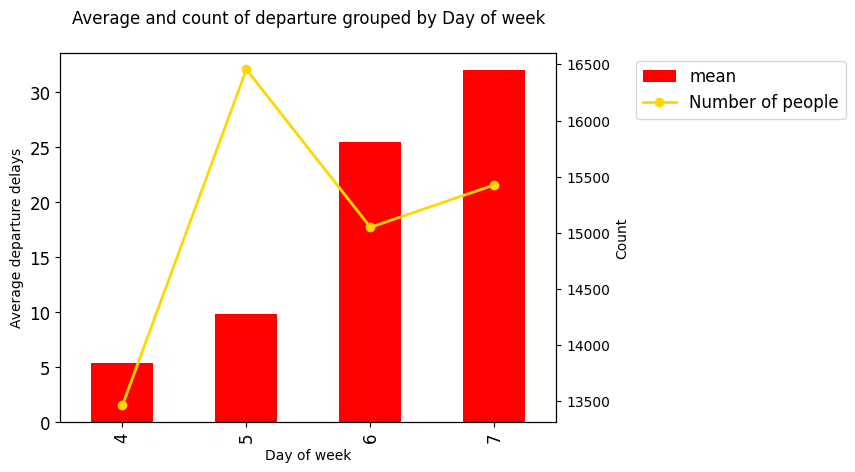

In [39]:
#Creating a plot with x as day of week, Y1 as mean and y2 a count
fig = plt.figure()
ax = arr_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Day of week")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [40]:
#average of different delay types
delay_type=pd.DataFrame(flight['AIR_SYSTEM_DELAY'].describe())
delay_type['SECURITY_DELAY']=pd.DataFrame(flight['SECURITY_DELAY'].describe())
delay_type['AIRLINE_DELAY']=pd.DataFrame(flight['AIRLINE_DELAY'].describe())
delay_type['LATE_AIRCRAFT_DELAY']=pd.DataFrame(flight['LATE_AIRCRAFT_DELAY'].describe())
delay_type['WEATHER_DELAY']=pd.DataFrame(flight['WEATHER_DELAY'].describe())
delay_type=pd.DataFrame(delay_type.iloc[1])
delay_type

,mean
AIR_SYSTEM_DELAY,12.900729
SECURITY_DELAY,0.084973
AIRLINE_DELAY,17.918169
LATE_AIRCRAFT_DELAY,26.137477
WEATHER_DELAY,1.932741


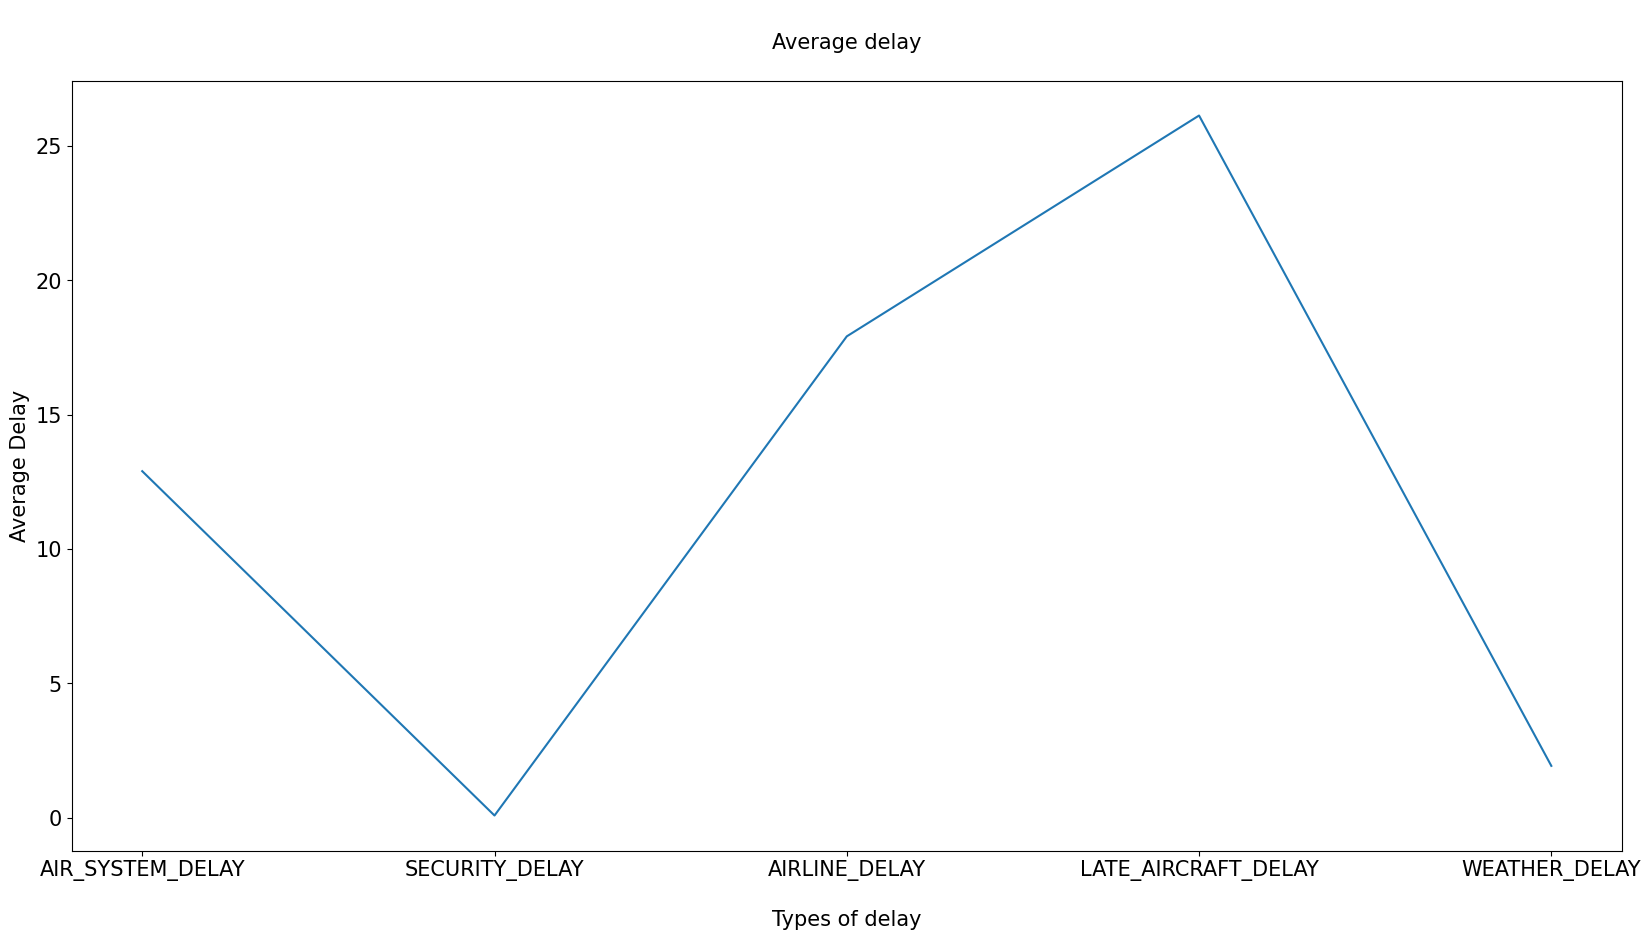

In [41]:
plt.figure(figsize=(20,10))
plt.plot(delay_type)
plt.tick_params(labelsize=15)
plt.xlabel("\nTypes of delay" ,fontsize=15)
plt.ylabel("Average Delay" ,fontsize=15)
plt.title("\nAverage delay\n",fontsize=15)
plt.show()

In [42]:
# Creating a dataframe to obtain the summary of arrival delay grouped by month
arr_mon=flight.groupby('MONTH')['ARRIVAL_DELAY'].describe()
arr_mon=arr_mon[['mean','count','min','25%','50%','75%','max']]
arr_mon=arr_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY MONTH : ")
arr_mon


ARRIVAL DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,18.388092,60398.0,-65.0,-8.0,5.0,28.0,1384.0


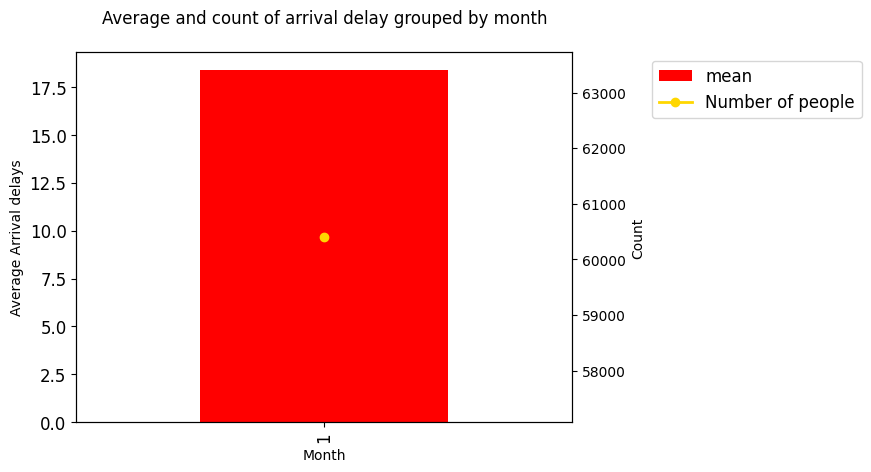

In [43]:
#Creating a plot with x as month, Y1 as mean and y2 a count
fig = plt.figure()
ax = arr_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of arrival delay grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average Arrival delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [44]:
# Creating a dataframe to obtain the summary of departure delay grouped by month
depart_mon=flight.groupby('MONTH')['DEPARTURE_DELAY'].describe()
depart_mon=depart_mon[['mean','count','min','25%','50%','75%','max']]
depart_mon=depart_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nDEPARTURE DELAY SUMMARY GROUPED BY MONTH : ")
depart_mon




DEPARTURE DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,19.843737,60398.0,-39.0,-3.0,3.0,25.0,1380.0


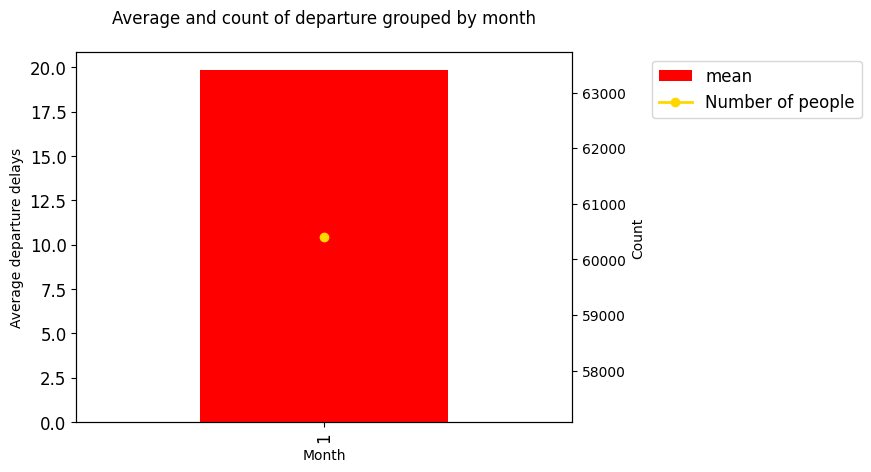

In [45]:
#Creating a plot with x as month, Y1 as mean and y2 a count
fig = plt.figure()
ax = depart_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()